# Projeto COVID-19

In [225]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go


In [226]:
url = 'https://github.com/mph7/projeto_covid/blob/main/covid_19_data.csv?raw=true'

In [227]:
df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [228]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [229]:
import re

def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

In [230]:
df.columns = [corrige_colunas(col) for col in df.columns]

In [231]:
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


# Brasil

In [232]:
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
84,85,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2525,2526,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2631,2632,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2742,2743,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2852,2853,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306272,306273,2021-05-29,Roraima,Brazil,2021-05-30 04:20:55,103222.0,1635.0,96188.0
306290,306291,2021-05-29,Santa Catarina,Brazil,2021-05-30 04:20:55,965277.0,15174.0,921496.0
306292,306293,2021-05-29,Sao Paulo,Brazil,2021-05-30 04:20:55,3254893.0,111123.0,2895697.0
306298,306299,2021-05-29,Sergipe,Brazil,2021-05-30 04:20:55,233932.0,5054.0,208146.0


In [233]:
brasil = df.loc[
    (df.countryregion == 'Brazil') & 
    (df.confirmed > 0.0)
]
agrupado = {'confirmed': 'sum', 'deaths': 'sum', 'recovered': 'sum', 'lastupdate': 'first', 'countryregion': 'first', 'sno': 'first'}
brasil = brasil.groupby('observationdate', as_index=False).aggregate(agrupado).reindex(columns=brasil.columns)

In [234]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,2526,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
1,2632,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2,2743,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
3,2853,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
4,2982,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
454,302778,2021-05-25,NaN,Brazil,2021-05-26 04:20:35,16194209.0,452031.0,14231991.0
455,303543,2021-05-26,NaN,Brazil,2021-05-27 04:20:59,16274695.0,454429.0,14272174.0
456,304308,2021-05-27,NaN,Brazil,2021-05-28 04:20:36,16342162.0,456674.0,14455810.0
457,305073,2021-05-28,NaN,Brazil,2021-05-29 04:20:41,16391930.0,459045.0,14492701.0


# Gráfico da evolução de casos confirmados

In [235]:
px.line(brasil, 'observationdate', 'confirmed', title='Casos Confirmados no Brasil')

# Novos casos por dia

In [236]:
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1],
    np.arange(brasil.shape[0])
))

In [237]:
px.line(brasil, 'observationdate', 'novoscasos', title='Novos Casos Confirmados no Brasil por Dia')

# Gráfico da Evolução de Mortes


In [238]:

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=brasil.observationdate, y=brasil.deaths, name='Mortes no Brasil', mode='lines+markers', line={'color': 'red'})
)

fig.update_layout(title='Mortes por COVID-19 no Brasil')

fig.show()

In [239]:
brasil['novasmortes'] = list(map(
    lambda x: 0 if (x==0) else brasil['deaths'].iloc[x] - brasil['deaths'].iloc[x-1],
    np.arange(brasil.shape[0])
))

px.line(brasil, 'observationdate', 'novasmortes', title='Novas Mortes Diárias por COVID-19 no Brasil')

# Taxa de crescimento

taxa_crescimento = (presente/passado)**(1/n) -1

In [240]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
  if data_inicio == None:
    data_inicio = data.observationdate.loc[data[variable] > 0].min()
  else:
    data_inicio = pd.to_datetime(data_inicio)

  if data_fim == None:
    data_fim = data.observationdate.iloc[-1]
  else:
    data_fim = pd.to_datetime(data_fim)

  passado = data.loc[data.observationdate == data_inicio, variable].values[0]
  presente = data.loc[data.observationdate == data_fim, variable].values[0]

  n = (data_fim - data_inicio).days

  taxa = (presente/passado)**(1/n) - 1

  return 100*taxa

In [241]:
# Taxa de crescimento médio do COVID no Brasil em todo o periodo
taxa_crescimento(brasil, 'confirmed')

3.694820710228286

In [242]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
  if data_inicio == None:
    data_inicio = data.observationdate.loc[data[variable] > 0].min()
  else:
    data_inicio = pd.to_datetime(data_inicio)

  data_fim = data.observationdate.max()
  n = (data_fim - data_inicio).days

  taxas = list(map(
      lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
      range(1, n+1)
  ))

  return np.array(taxas) * 100

In [243]:
tx_dia = taxa_crescimento_diaria(brasil, 'confirmed')

In [244]:
#@title Default title text
tx_dia

array([0.00000000e+00, 0.00000000e+00, 1.00000000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+02, 0.00000000e+00,
       2.25000000e+02, 0.00000000e+00, 5.38461538e+01, 2.50000000e+01,
       2.40000000e+01, 2.25806452e+01, 3.68421053e+01, 1.90384615e+02,
       0.00000000e+00, 7.28476821e+00, 2.34567901e+01, 6.05000000e+01,
       1.58878505e+01, 6.69354839e+01, 2.76972625e+01, 2.87515763e+01,
       5.14201763e+01, 2.44501940e+01, 1.67879418e+01, 1.36626613e+01,
       1.68754894e+01, 1.44723618e+01, 1.42522681e+01, 9.01639344e+00,
       7.58928571e+00, 2.48525879e+01, 1.95732027e+01, 1.76711527e+01,
       1.25808056e+01, 1.43992933e+01, 7.43243243e+00, 9.26325247e+00,
       1.54016939e+01, 1.52201796e+01, 1.18862090e+01, 8.54521335e+00,
       5.54537122e+00, 7.06807546e+00, 5.57858688e+00, 7.81903542e+00,
       1.21051382e+01, 7.43290960e+00, 1.07050123e+01, 8.83557983e+00,
       5.44492335e+00, 5.40435660e+00, 5.73350023e+00, 6.21648599e+00,
      

In [245]:
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()

px.line(x=pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil')

# Predições

In [246]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [247]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados

observationdate
2020-02-26           1.0
2020-02-27           1.0
2020-02-28           1.0
2020-02-29           2.0
2020-03-01           2.0
                 ...    
2021-05-25    16194209.0
2021-05-26    16274695.0
2021-05-27    16342162.0
2021-05-28    16391930.0
2021-05-29    16471600.0
Name: confirmed, Length: 459, dtype: float64

In [248]:
res = seasonal_decompose(confirmados)

<function matplotlib.pyplot.show>

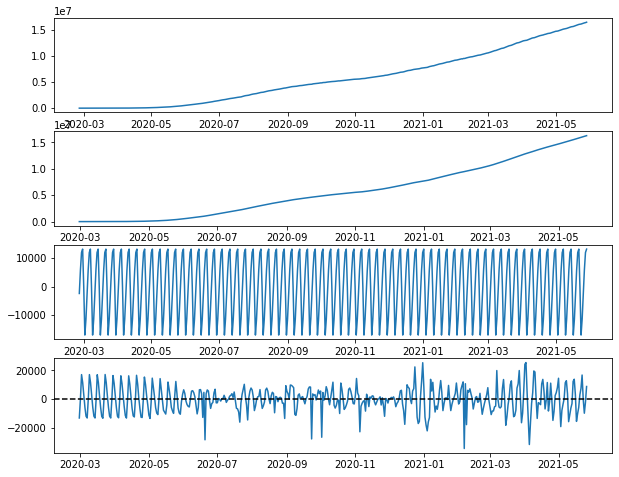

In [249]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show

# ARIMA

In [250]:
!pip install pmdarima

In [251]:
from pmdarima.arima import auto_arima
modelo = auto_arima(confirmados)

In [252]:
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observados'
))

fig.add_trace(go.Scatter(
    x=confirmados.index, y=modelo.predict_in_sample(), name='Preditos'
))

fig.add_trace(go.Scatter(
    x=pd.date_range('2021-05-29', '2021-06-29'), y=modelo.predict(31), name='Forecast'
))

fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias')

fig.show()

# Modelo de crescimento

In [253]:
!pip install fbprophet

In [254]:
from fbprophet import Prophet

In [255]:
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

train.rename(columns={'observationdate':'ds', 'confirmed':'y'}, inplace=True)
test.rename(columns={'observationdate':'ds', 'confirmed':'y'}, inplace=True)

profeta = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30', '2020-4-25', 
                                                   '2020-05-03', '2020-05-10'])
pop = 211463256
train['cap'] = pop

profeta.fit(train)

future_dates = profeta.make_future_dataframe(periods=1200)
future_dates['cap'] = pop
forecast = profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [256]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Prediçao'))
#fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Prediçoes de casos confirmados no Brasil')
fig.show()